In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as ts

# Data From Yahoo Finance

- Only provides daily data (no mins, secs)

In [3]:
from data_io import download_stock_data, load_stock_data

In [4]:
download_stock_data('data/samsung.data', '005930', 2015, 1, 1, 2015, 11, 30)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,26800.0,26540.0,26800.0,26600.0,8774950.0,257.958313
2015-01-05,26720.0,26260.0,26720.0,26660.0,10139500.0,258.540161
2015-01-06,26340.0,25760.0,26300.0,25900.0,15235500.0,251.169937
2015-01-07,26220.0,25640.0,25880.0,26140.0,14322750.0,253.497406
2015-01-08,26780.0,26200.0,26780.0,26280.0,14477600.0,254.855087
...,...,...,...,...,...,...
2015-11-25,26200.0,25980.0,26000.0,25980.0,7131350.0,262.204163
2015-11-26,26800.0,25980.0,25980.0,26700.0,9290000.0,269.470734
2015-11-27,26980.0,26540.0,26900.0,26540.0,8492700.0,267.855957


In [5]:
download_stock_data('data/hanmi.data', '128940', 2015, 1, 1, 2015, 11, 30)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,88948.203125,87715.203125,87715.203125,88948.203125,45869,88565.664062
2015-01-05,88507.796875,85513.500000,87715.203125,87010.703125,50491,86636.500000
2015-01-06,87451.000000,85073.203125,85953.898438,86130.000000,45278,85759.578125
2015-01-07,86570.398438,84280.601562,86218.101562,85953.898438,39787,85584.226562
2015-01-08,88948.203125,84985.101562,85425.500000,88948.203125,40097,88565.664062
...,...,...,...,...,...,...
2015-11-25,749454.000000,717750.000000,722154.000000,737125.000000,211174,733954.812500
2015-11-26,755619.000000,732722.000000,744170.000000,732722.000000,159779,729570.750000
2015-11-27,738006.000000,716870.000000,736244.000000,727438.000000,143288,724309.437500


In [6]:
df_samsung = load_stock_data('data/samsung.data')
df_hanmi = load_stock_data('data/hanmi.data')

In [21]:
df_samsung.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2015-11-18', '2015-11-19', '2015-11-20', '2015-11-23',
               '2015-11-24', '2015-11-25', '2015-11-26', '2015-11-27',
               '2015-11-30', '2015-12-01'],
              dtype='datetime64[ns]', name='Date', length=229, freq=None)

In [7]:
df_samsung['Close'].cov(df_hanmi['Close'])

-128580933.53275786

In [8]:
df_samsung['Close'].corr(df_hanmi['Close'])

-0.35811007434807124

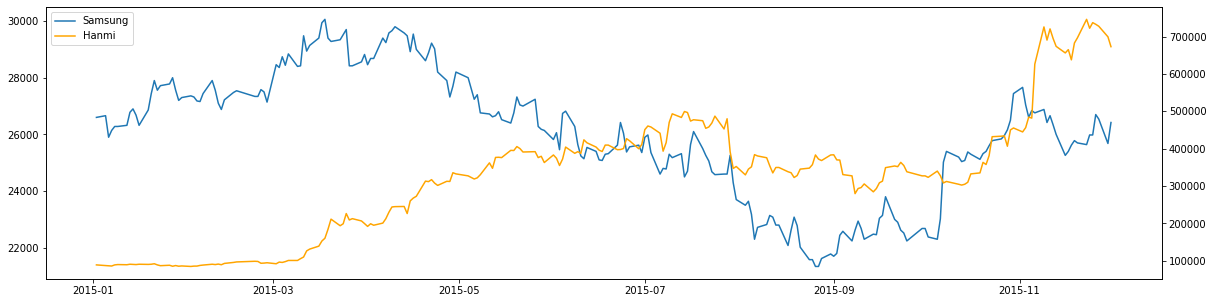

In [59]:
fig = plt.figure(figsize=(20, 5))

ax1 = fig.add_subplot(111)
lns1 = ax1.plot(df_samsung['Close'], label='Samsung')

ax2 = ax1.twinx()
lns2 = ax2.plot(df_hanmi['Close'], color='orange', label='Hanmi')

lns = lns1 + lns2
labs = [l.get_label() for l in lns]
plt.legend(lns, labs, loc=0)

plt.show()

# Mean Reversion Model

## 1) Augmented Dickey-Fuller

In [67]:
print(ts.adfuller(df_samsung['Close']))
print(ts.adfuller(df_hanmi['Close']))

(-1.114457699220574, 0.7092720393825198, 3, 225, {'1%': -3.4597521044060353, '5%': -2.874472927517147, '10%': -2.5736628197530864}, 3195.396251743775)
(-0.33319183918206563, 0.9206700467999618, 0, 228, {'1%': -3.4593607492757554, '5%': -2.8743015807562924, '10%': -2.5735714042782396}, 4862.533086699373)


## 2) Hust Exponent

In [51]:
def get_hurst_exponent(df) :
    lags = range(2, 100)
    ts = np.log(df)
    
    tau = [np.sqrt(np.std(np.subtract(ts[lag:].reset_index(drop=True), 
                                      ts[:-lag].reset_index(drop=True)))) for lag in lags]
    poly = np.polyfit(np.log(lags), np.log(tau), 1)
    
    result = poly[0] * 2.0
    
    return result

In [54]:
hurst_samsung = get_hurst_exponent(df_samsung['Close'])
hurst_hanmi = get_hurst_exponent(df_hanmi['Close'])

In [61]:
print(hurst_samsung)
print(hurst_hanmi)

0.40465533297979767
0.5739773764440907


## 3) Half-life

In [64]:
def get_half_life(df) :
    price = pd.Series(df)
    lagged_price = price.shift(1).fillna(method='bfill')
    delta = price - lagged_price
    beta = np.polyfit(lagged_price, delta, 1)[0]
    half_life = (-1*np.log(2)/beta)
    
    return half_life

In [65]:
print(get_half_life(df_samsung['Close']))
print(get_half_life(df_hanmi['Close']))

34.52913946371073
253.94676130703212


# Pilot Run

In [22]:
from dataset import make_dataset, split_dataset

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [116]:
company = 'data/samsung'
time_lags = 5

df_company = load_stock_data('%s.data'%(company))

df_dataset = make_dataset(df_company, time_lags)
features = ['Close_Lag%s'%(time_lags), 
           'Volumne_Lag%s'%(time_lags)]
x_train, x_test, y_train, y_test = split_dataset(df_dataset, features, 'Close_Direction', 0.75)

evaluate(RandomForestClassifier(), x_train, y_train, x_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


(0.5636363636363636, 0.5636363636363636)

In [112]:
df_dataset.iloc[0:6]

,Close,Volumne,Close_Lag5,Close_Lag5_Change,Volumne_Lag5,Volumne_Lag5_Change,Close_Direction,Volume_Direction
Date,,,,,,,,
2015-01-12,26320.0,8325400.0,26660.0,0.225564,10139500.0,15.550516,1.0,1.0
2015-01-13,26780.0,12293400.0,25900.0,-2.850713,15235500.0,50.258889,-1.0,1.0
2015-01-14,26900.0,14332250.0,26140.0,0.926641,14322750.0,-5.990942,1.0,-1.0
2015-01-15,26680.0,14103900.0,26280.0,0.535578,14477600.0,1.081147,1.0,1.0
2015-01-16,26320.0,13568500.0,26280.0,0.000000,9312400.0,-35.677184,0.0,-1.0
2015-01-19,26860.0,6672950.0,26320.0,0.152207,8325400.0,-10.598772,1.0,-1.0


In [113]:
x_train

,Close_Lag5,Volumne_Lag5
Date,,
2015-01-12,26660.0,10139500.0
2015-01-13,25900.0,15235500.0
2015-01-14,26140.0,14322750.0
2015-01-15,26280.0,14477600.0
2015-01-16,26280.0,9312400.0
...,...,...
2015-09-04,21620.0,23111150.0
2015-09-07,21780.0,20415450.0
2015-09-08,21700.0,12018600.0


In [114]:
y_train

Date
2015-01-12    1.0
2015-01-13   -1.0
2015-01-14    1.0
2015-01-15    1.0
2015-01-16    0.0
             ... 
2015-09-04    1.0
2015-09-07    1.0
2015-09-08   -1.0
2015-09-09    1.0
2015-09-10    1.0
Name: Close_Direction, Length: 168, dtype: float64

In [100]:
from sklearn.metrics import accuracy_score

def evaluate(model, x_train, y_train, x_test, y_test) :
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    score = model.score(x_test, y_test)
    
    hit_count = accuracy_score(pred, y_test, normalize=False)
    hit_ratio = hit_count / pred.shape[0]
    
    return hit_ratio, score